task-1

In [2]:
# 1. Imports and Setup
import os
import sys
import importlib.util
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Current working directory (where the notebook is)
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Project root (parent of notebook folder)
project_root = os.path.abspath(os.path.join(current_dir, '..'))
scripts_path = os.path.join(project_root, 'Scripts')  # <-- Correct path

# Add Scripts folder to sys.path
if os.path.exists(scripts_path):
    sys.path.insert(0, scripts_path)
else:
    raise FileNotFoundError(f"Scripts folder not found at {scripts_path}")

# Helper function to import local classes/functions
def _import_local_class(module_name, class_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return getattr(module, class_name)

# Paths to your local scripts
preprocessing_path = os.path.join(scripts_path, 'preprocessing.py')
scraper_path = os.path.join(scripts_path, 'scraper.py')

# Import ReviewPreprocessor
ReviewPreprocessor = _import_local_class('preprocessing', 'ReviewPreprocessor', preprocessing_path)

# Import scraper main
spec = importlib.util.spec_from_file_location('scraper', scraper_path)
scraper_mod = importlib.util.module_from_spec(spec)
spec.loader.exec_module(scraper_mod)
run_scraper = scraper_mod.main

print("Modules loaded successfully!")


Current working directory: c:\Users\kalki\OneDrive\Desktop\week2\mobile-banking-reviews-Challenge-week2\notebooks
Modules loaded successfully!


Scrape Reviews

In [3]:
# 2. Scrape reviews for all banks
print("Scraping reviews from Google Play Store...")

# Run the scraper
reviews_df = run_scraper()

# Check if data was collected
if reviews_df.empty:
    print("No reviews were collected!")
else:
    print(f"Collected {len(reviews_df)} reviews")
    display(reviews_df.head())


Scraping reviews from Google Play Store...


Scraping banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping Commercial Bank of Ethiopia (CBE) - App ID: com.combanketh.mobilebanking
Collected 400 reviews for Commercial Bank of Ethiopia


Scraping banks:  33%|███▎      | 1/3 [00:04<00:08,  4.11s/it]


Scraping Bank of Abyssinia (BOA) - App ID: com.boa.boaMobileBanking
Collected 400 reviews for Bank of Abyssinia


Scraping banks:  67%|██████▋   | 2/3 [00:09<00:04,  4.78s/it]


Scraping Dashen Bank (DashenBank) - App ID: com.dashen.dashensuperapp
Collected 400 reviews for Dashen Bank


Scraping banks: 100%|██████████| 3/3 [00:14<00:00,  4.67s/it]


All reviews saved to data/raw/reviews_raw.csv
                              review_id  \
0  28f229b5-0026-41b9-a1eb-b76e74736f63   
1  68d8daea-db47-4e23-a692-755173dea983   
2  ee0dbb0e-4eb0-47b5-9874-c37877493f99   
3  5112423d-e618-44ba-ba49-62677cb76cd6   
4  bcb34681-1dd4-4781-b400-4393bb10b1d9   

                                         review_text  rating  \
0                             Make it user friendly.       2   
1                   maaliif daddafee install gaafata       3   
2                                           good app       5   
3  This application is very important and advanta...       5   
4                          why didn't work this app?       1   

          review_date         user_name  thumbs_up reply_content bank_code  \
0 2025-11-29 08:17:45  TOMIZ Creativity          0          None       CBE   
1 2025-11-28 13:36:32      Tesfaye Abdi          0          None       CBE   
2 2025-11-28 11:33:17   Betelhem Kebede          0          None       CBE 

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


Preprocess Reviews

In [4]:
# 3. Preprocess the scraped reviews
print("\nPreprocessing the review data...")

# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the full preprocessing pipeline
processed_df = preprocessor.process()

# Display processed data
if processed_df is not None:
    print(f"Processed {len(processed_df)} reviews")
    display(processed_df.head())



Preprocessing the review data...
Removed 188 duplicate reviews
Removed 180 Amharic/non-English reviews
Processed data saved to data/processed/reviews_processed.csv
Processed 832 reviews


,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29,TOMIZ Creativity,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play
1,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28,Tesfaye Abdi,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28,Betelhem Kebede,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play
3,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27,Gurawaa Dooguu,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play
4,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27,Yohannesb Adugna,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


Visualization

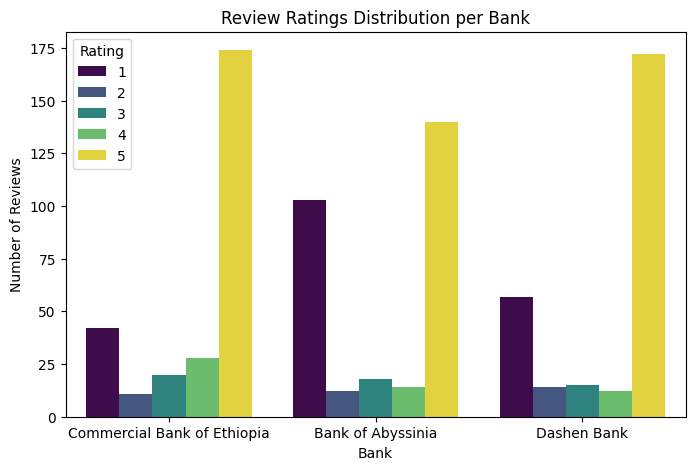

In [5]:
# 4. Visualize review ratings per bank
if processed_df is not None and not processed_df.empty:
    plt.figure(figsize=(8,5))
    sns.countplot(data=processed_df, x='bank_name', hue='rating', palette='viridis')
    plt.title("Review Ratings Distribution per Bank")
    plt.xlabel("Bank")
    plt.ylabel("Number of Reviews")
    plt.legend(title='Rating')
    plt.show()


In [6]:
reviews_df['bank_name'].value_counts()


bank_name
Commercial Bank of Ethiopia    400
Bank of Abyssinia              400
Dashen Bank                    400
Name: count, dtype: int64

Data Preprocessing

In [7]:
# Initialize ReviewPreprocessor
preprocessor = ReviewPreprocessor()


Run the preprocessing pipeline:

In [8]:
# Run full preprocessing
processed_df = preprocessor.process()


Removed 188 duplicate reviews
Removed 180 Amharic/non-English reviews
Processed data saved to data/processed/reviews_processed.csv


Quick verification of preprocessed data:

In [9]:
# Check counts per bank
processed_df['bank_name'].value_counts()

# Check basic stats
processed_df.describe()


,rating,thumbs_up
count,832.000000,832.000000
mean,3.703125,7.221154
std,1.710614,52.903260
min,1.000000,0.000000
25%,2.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1108.000000


Preview cleaned reviews:

In [10]:
# Display a few sample reviews
processed_df[['review_text', 'rating', 'bank_name']].head(5)


,review_text,rating,bank_name
0,Make it user friendly.,2,Commercial Bank of Ethiopia
1,maaliif daddafee install gaafata,3,Commercial Bank of Ethiopia
2,good app,5,Commercial Bank of Ethiopia
3,This application is very important and advanta...,5,Commercial Bank of Ethiopia
4,why didn't work this app?,1,Commercial Bank of Ethiopia


Visualization

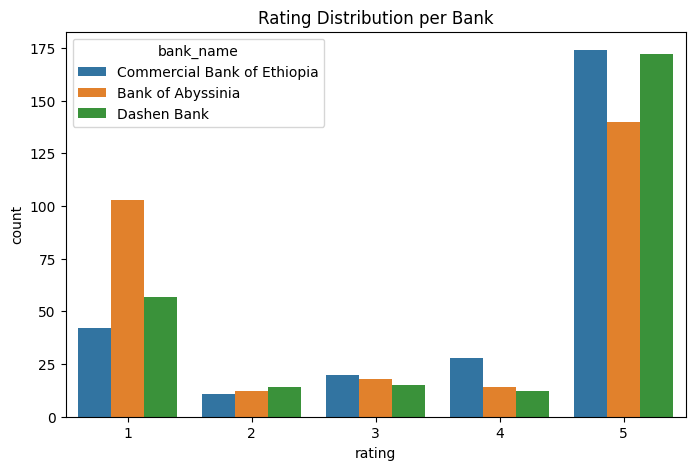

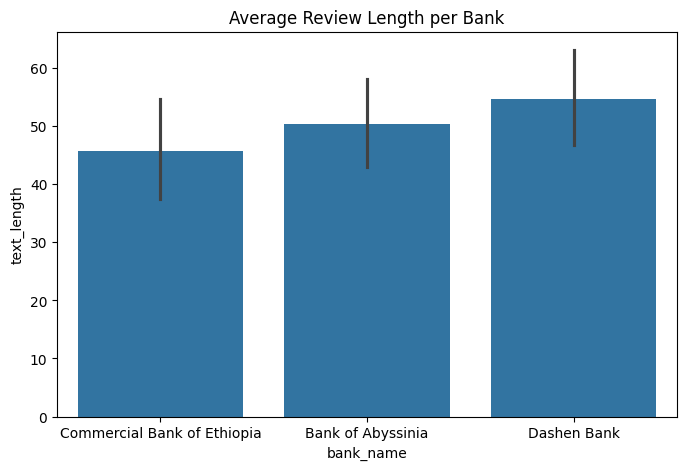

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution per bank
plt.figure(figsize=(8,5))
sns.countplot(data=processed_df, x='rating', hue='bank_name')
plt.title("Rating Distribution per Bank")
plt.show()

# Average review length per bank
processed_df['text_length'] = processed_df['review_text'].str.len()
plt.figure(figsize=(8,5))
sns.barplot(data=processed_df, x='bank_name', y='text_length')
plt.title("Average Review Length per Bank")
plt.show()
